In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('urldata.csv') 

In [3]:
df.shape

(10000, 26)

In [4]:
df.sample(10)

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IpAddress,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,TinyURL,iFrame,Mouse_Over,Label
8852,3,4,5,57,1,1,0,0,0,0,...,0,0,24,33,0,0,0,1,1,1
6398,2,3,6,40,0,0,0,0,0,0,...,0,0,13,27,0,0,0,1,1,1
4556,2,3,4,64,1,1,0,0,3,0,...,0,0,18,46,0,0,0,1,1,0
9891,1,2,6,44,1,1,0,0,0,0,...,0,0,18,26,0,0,0,1,1,1
3914,2,3,2,81,0,0,0,0,0,7,...,0,0,13,10,57,0,0,1,1,0
3110,3,4,2,35,2,2,0,0,0,0,...,0,0,13,22,0,0,1,1,1,0
4958,3,4,8,74,0,0,0,0,0,0,...,0,0,25,49,0,0,0,1,1,0
6100,4,3,3,149,1,0,1,0,0,0,...,0,0,20,18,110,0,0,1,1,1
8930,3,4,5,59,0,0,0,0,0,0,...,0,0,22,37,0,0,0,1,1,1
1734,1,2,3,31,1,1,0,0,0,0,...,0,0,11,20,0,0,0,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   NumDots             10000 non-null  int64
 1   SubdomainLevel      10000 non-null  int64
 2   PathLevel           10000 non-null  int64
 3   UrlLength           10000 non-null  int64
 4   NumDash             10000 non-null  int64
 5   NumDashInHostname   10000 non-null  int64
 6   AtSymbol            10000 non-null  int64
 7   TildeSymbol         10000 non-null  int64
 8   NumUnderscore       10000 non-null  int64
 9   NumPercent          10000 non-null  int64
 10  NumQueryComponents  10000 non-null  int64
 11  NumAmpersand        10000 non-null  int64
 12  NumHash             10000 non-null  int64
 13  NumNumericChars     10000 non-null  int64
 14  NoHttps             10000 non-null  int64
 15  RandomString        10000 non-null  int64
 16  IpAddress           10000 non-null  int64

In [6]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

NumDots has 24 unique values
SubdomainLevel has 23 unique values
PathLevel has 21 unique values
UrlLength has 307 unique values
NumDash has 24 unique values
NumDashInHostname has 24 unique values
AtSymbol contains:			[0 1 2]
TildeSymbol contains:			[0 1 2]
NumUnderscore has 18 unique values
NumPercent has 21 unique values
NumQueryComponents has 14 unique values
NumAmpersand has 17 unique values
NumHash contains:			[0 1]
NumNumericChars has 129 unique values
NoHttps contains:			[0 1]
RandomString contains:			[0 1]
IpAddress contains:			[0 1]
HttpsInHostname contains:			[0 1]
HostnameLength has 142 unique values
PathLength has 178 unique values
QueryLength has 215 unique values
DoubleSlashInPath contains:			[0 1]
TinyURL contains:			[0 1]
iFrame contains:			[1]
Mouse_Over contains:			[1]
Label contains:			[0 1]


In [7]:
target = df['Label']
features = df.drop(['Label'], axis=1)

In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature Scaling

### - MinMax Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [11]:
# Transform train and test sets

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [13]:
np.round(X_train_scaled.describe())

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,RandomString,IpAddress,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,TinyURL,iFrame,Mouse_Over
count,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,...,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


# Feature Selection

### 1. Univariate Selection

In [14]:
X=df.iloc[:,:-1]
Y=df['Label']

In [15]:
X.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,RandomString,IpAddress,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,TinyURL,iFrame,Mouse_Over
0,3,4,3,30,0,0,0,0,0,0,...,0,0,0,14,16,0,0,0,1,1
1,2,3,5,96,4,0,0,0,0,0,...,1,0,0,10,46,39,0,0,1,1
2,2,3,2,36,0,0,0,0,0,0,...,0,0,0,21,15,0,0,0,1,1
3,3,4,2,79,6,1,0,0,0,0,...,0,0,0,28,15,35,0,0,1,1
4,1,2,4,35,1,1,0,0,0,0,...,0,0,0,10,25,0,0,0,1,1


In [16]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [18]:
df.shape

(10000, 26)

In [19]:
# Apply SelectKBest after imputing missing values
ordered_rank_features = SelectKBest(score_func=chi2, k=20)
ordered_feature = ordered_rank_features.fit(X_train, y_train)

In [20]:
import pandas as pd
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["score"])
dfcolumns=pd.DataFrame(X.columns)

In [21]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [22]:
features_rank.columns=['features','Score']
features_rank

,features,Score
0,NumDots,1.303765e+03
1,SubdomainLevel,4.806091e+02
2,PathLevel,1.419053e+02
3,UrlLength,2.050258e+04
4,NumDash,7.772011e+02
5,NumDashInHostname,1.161701e+03
6,AtSymbol,4.771020e+01
7,TildeSymbol,8.449790e-01
8,NumUnderscore,5.785175e+01
9,NumPercent,2.293421e+02


In [23]:
# feature Importance:
# this technique gives you a score for each feature of your data the higher the score more relevant it is

features_rank.nlargest(15,'Score')

,features,Score
20,QueryLength,54515.948603
3,UrlLength,20502.583981
13,NumNumericChars,14179.583152
18,HostnameLength,3331.934251
0,NumDots,1303.764696
5,NumDashInHostname,1161.700705
4,NumDash,777.201103
11,NumAmpersand,677.045241
1,SubdomainLevel,480.609117
15,RandomString,409.516186


In [24]:
dataset_1 = df[['QueryLength', 'UrlLength', 'NumNumericChars', 'HostnameLength', 'NumDots', 'NumDashInHostname', 'NumDash', 'NumAmpersand', 'SubdomainLevel', 'RandomString', 'NumQueryComponents', 'NumPercent', 'PathLevel', 'IpAddress', 'NumUnderscore', 'Label']]

In [25]:
dataset_1

,QueryLength,UrlLength,NumNumericChars,HostnameLength,NumDots,NumDashInHostname,NumDash,NumAmpersand,SubdomainLevel,RandomString,NumQueryComponents,NumPercent,PathLevel,IpAddress,NumUnderscore,Label
0,0,30,0,14,3,0,0,0,4,0,0,0,3,0,0,0
1,39,96,15,10,2,0,4,0,3,1,1,0,5,0,0,0
2,0,36,0,21,2,0,0,0,3,0,0,0,2,0,0,0
3,35,79,7,28,3,1,6,0,4,0,0,0,2,0,0,0
4,0,35,0,10,1,1,1,0,2,0,0,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,26,0,13,2,0,0,0,3,0,0,0,2,0,0,1
9996,0,17,13,4,3,0,0,0,1,0,0,0,1,1,0,1
9997,0,34,0,15,2,0,0,0,3,0,0,0,2,0,1,1
9998,0,17,0,8,1,0,0,0,2,0,0,0,2,0,0,1


In [26]:
dataset_1.to_csv('dataset_1.csv', index= False)

## 2. Using ExtraTrees Classifier

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [28]:
print(model.feature_importances_)

[0.0660487  0.04690218 0.0936404  0.13532651 0.03673698 0.03843921
 0.00460829 0.00733374 0.04345439 0.00692075 0.020276   0.0071303
 0.00052067 0.11596527 0.00490205 0.03895068 0.01342595 0.00054487
 0.12885332 0.14345564 0.03399654 0.00269358 0.00987399 0.
 0.        ]


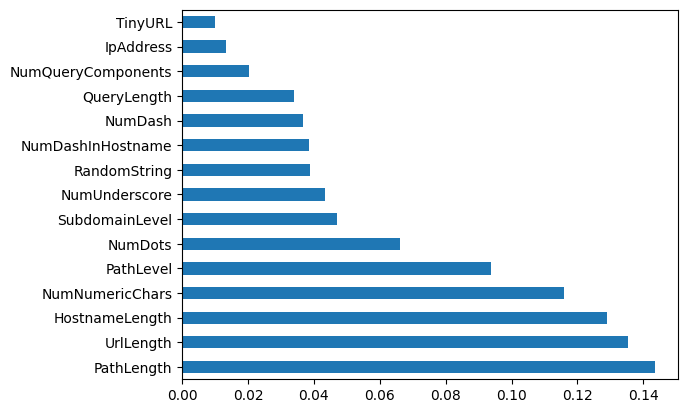

In [29]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()


In [30]:
dataset_2 = df[['PathLength', 'UrlLength', 'HostnameLength', 'NumNumericChars', 'PathLevel', 'NumDots', 'SubdomainLevel', 'NumUnderscore', 'NumDashInHostname', 'RandomString', 'NumDash', 'QueryLength', 'NumQueryComponents', 'IpAddress', 'TinyURL', 'Label']]

In [31]:
dataset_2

,PathLength,UrlLength,HostnameLength,NumNumericChars,PathLevel,NumDots,SubdomainLevel,NumUnderscore,NumDashInHostname,RandomString,NumDash,QueryLength,NumQueryComponents,IpAddress,TinyURL,Label
0,16,30,14,0,3,3,4,0,0,0,0,0,0,0,0,0
1,46,96,10,15,5,2,3,0,0,1,4,39,1,0,0,0
2,15,36,21,0,2,2,3,0,0,0,0,0,0,0,0,0
3,15,79,28,7,2,3,4,0,1,0,6,35,0,0,0,0
4,25,35,10,0,4,1,2,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,13,26,13,0,2,2,3,0,0,0,0,0,0,0,1,1
9996,5,17,4,13,1,3,1,0,0,0,0,0,0,1,0,1
9997,19,34,15,0,2,2,3,1,0,0,0,0,0,0,0,1
9998,9,17,8,0,2,1,2,0,0,0,0,0,0,0,0,1


In [32]:
dataset_2.to_csv('dataset_2.csv', index= False)

## 3. Using Information Gain

In [33]:
from sklearn.feature_selection import mutual_info_classif

In [34]:
mutual_info=mutual_info_classif(X,Y)

In [35]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

NumDots               0.070187
SubdomainLevel        0.054225
NumNumericChars       0.050572
QueryLength           0.036363
UrlLength             0.033446
PathLevel             0.029383
RandomString          0.027238
NumDashInHostname     0.026856
NumQueryComponents    0.022711
HostnameLength        0.021343
NumDash               0.021042
NumPercent            0.010552
NoHttps               0.009276
NumUnderscore         0.005089
IpAddress             0.005008
iFrame                0.004935
NumHash               0.004177
DoubleSlashInPath     0.003307
Mouse_Over            0.003115
NumAmpersand          0.003044
TinyURL               0.001272
AtSymbol              0.000697
HttpsInHostname       0.000324
PathLength            0.000000
TildeSymbol           0.000000
dtype: float64

In [36]:
dataset_3 = df[['NumDots', 'NumNumericChars', 'SubdomainLevel', 'RandomString', 'UrlLength', 'QueryLength', 'PathLevel', 'NumDashInHostname', 'HostnameLength', 'NumDash', 'NumQueryComponents', 'HttpsInHostname', 'IpAddress', 'NumUnderscore', 'Label']]

In [37]:
dataset_3

,NumDots,NumNumericChars,SubdomainLevel,RandomString,UrlLength,QueryLength,PathLevel,NumDashInHostname,HostnameLength,NumDash,NumQueryComponents,HttpsInHostname,IpAddress,NumUnderscore,Label
0,3,0,4,0,30,0,3,0,14,0,0,0,0,0,0
1,2,15,3,1,96,39,5,0,10,4,1,0,0,0,0
2,2,0,3,0,36,0,2,0,21,0,0,0,0,0,0
3,3,7,4,0,79,35,2,1,28,6,0,0,0,0,0
4,1,0,2,0,35,0,4,1,10,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,3,0,26,0,2,0,13,0,0,0,0,0,1
9996,3,13,1,0,17,0,1,0,4,0,0,0,1,0,1
9997,2,0,3,0,34,0,2,0,15,0,0,0,0,1,1
9998,1,0,2,0,17,0,2,0,8,0,0,0,0,0,1


In [38]:
dataset_3.to_csv('dataset_3.csv', index= False)